Loading 20 Newsgroups dataset for categories: ['soc.religion.christian', 'comp.graphics', 'sci.med']
Training samples: 1777
Test samples: 1183
Target names (classes): ['comp.graphics', 'sci.med', 'soc.religion.christian']

Using N-gram range: (1, 2)

Training the Naive Bayes model...
Training complete.

Predicting classes for the test set...

--- Evaluation Results ---
Accuracy: 0.8893

Classification Report:
                        precision    recall  f1-score   support

         comp.graphics       0.93      0.90      0.92       389
               sci.med       0.97      0.79      0.87       396
soc.religion.christian       0.80      0.97      0.88       398

              accuracy                           0.89      1183
             macro avg       0.90      0.89      0.89      1183
          weighted avg       0.90      0.89      0.89      1183


Confusion Matrix:
[[351   6  32]
 [ 19 313  64]
 [  7   3 388]]


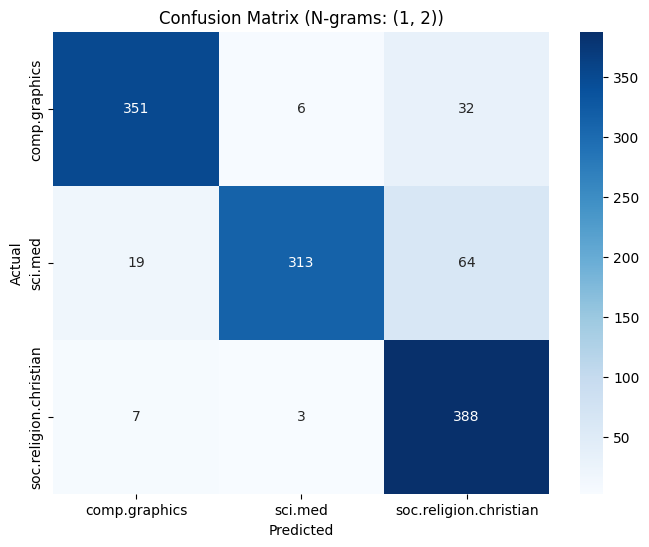

In [11]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['soc.religion.christian', 'comp.graphics', 'sci.med']

print("Loading 20 Newsgroups dataset for categories:", categories)

# Load training data
newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)

# Load test data
newsgroups_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)

print(f"Training samples: {len(newsgroups_train.data)}")
print(f"Test samples: {len(newsgroups_test.data)}")
print(f"Target names (classes): {newsgroups_train.target_names}")

ngram_range = (1, 2)  # Using Unigrams and Bigrams

print(f"\nUsing N-gram range: {ngram_range}")

model_pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', ngram_range=ngram_range),
    MultinomialNB()
)

print("\nTraining the Naive Bayes model...")
model_pipeline.fit(newsgroups_train.data, newsgroups_train.target)
print("Training complete.")

print("\nPredicting classes for the test set...")
predicted_categories = model_pipeline.predict(newsgroups_test.data)

print("\n--- Evaluation Results ---")

accuracy = accuracy_score(newsgroups_test.target, predicted_categories)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(
    newsgroups_test.target,
    predicted_categories,
    target_names=newsgroups_test.target_names
))

print("\nConfusion Matrix:")
cm = confusion_matrix(newsgroups_test.target, predicted_categories)
print(cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix (N-grams: {ngram_range})')
plt.show()




Using N-gram range: (3, 3)

Training the Naive Bayes model...
Training complete.

Predicting classes for the test set...

--- Evaluation Results ---
Accuracy: 0.5224

Classification Report:
                        precision    recall  f1-score   support

         comp.graphics       0.86      0.37      0.52       389
               sci.med       0.80      0.25      0.38       396
soc.religion.christian       0.42      0.94      0.58       398

              accuracy                           0.52      1183
             macro avg       0.70      0.52      0.49      1183
          weighted avg       0.69      0.52      0.49      1183


Confusion Matrix:
[[145   9 235]
 [ 15  98 283]
 [  8  15 375]]


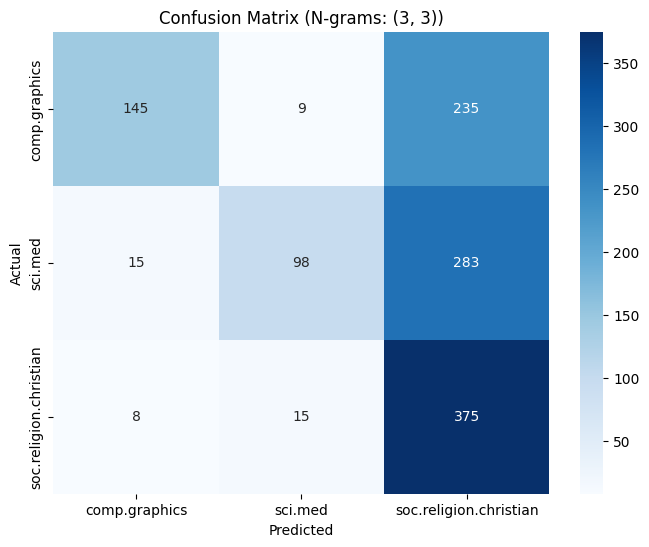

In [21]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


ngram_range = (3, 3)  # Using Unigrams and Bigrams

print(f"\nUsing N-gram range: {ngram_range}")

model_pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', ngram_range=ngram_range),
    MultinomialNB()
)

print("\nTraining the Naive Bayes model...")
model_pipeline.fit(newsgroups_train.data, newsgroups_train.target)
print("Training complete.")

print("\nPredicting classes for the test set...")
predicted_categories = model_pipeline.predict(newsgroups_test.data)

print("\n--- Evaluation Results ---")

accuracy = accuracy_score(newsgroups_test.target, predicted_categories)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(
    newsgroups_test.target,
    predicted_categories,
    target_names=newsgroups_test.target_names
))

print("\nConfusion Matrix:")
cm = confusion_matrix(newsgroups_test.target, predicted_categories)
print(cm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix (N-grams: {ngram_range})')
plt.show()



In [20]:
import numpy as np
import re
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# --- Function to generate co-occurrence matrix ---
def generate_cooccurrence_matrix(corpus, window_size=2):
    tokens = []
    for text in corpus:
        words = re.findall(r'\b\w+\b', text.lower())  # Lowercase + word tokenization
        tokens.extend(words)

    vocab = sorted(list(set(tokens)))  # Unique words
    word_to_idx = {word: i for i, word in enumerate(vocab)}
    idx_to_word = vocab
    vocab_size = len(vocab)
    print(f"\nVocabulary Size: {vocab_size}\nWords: {vocab}\n")

    matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for i, center_word in enumerate(tokens):
        center_idx = word_to_idx[center_word]

        start = max(0, i - window_size)
        end = min(len(tokens), i + window_size + 1)

        for j in range(start, end):
            if i == j:
                continue
            context_word = tokens[j]
            context_idx = word_to_idx[context_word]
            matrix[center_idx, context_idx] += 1

    return matrix, word_to_idx, idx_to_word

# --- Small custom corpus with limited vocabulary ---
corpus = [
    "Cats and dogs are common pets.",
    "Dogs bark and guard the house.",
    "Cats meow and love to sleep.",
    "Pets need love and care."
]

window_size = 2
co_matrix, word_to_idx, idx_to_word = generate_cooccurrence_matrix(corpus, window_size=window_size)

# --- Display Co-occurrence Matrix ---
df_matrix = pd.DataFrame(co_matrix, index=idx_to_word, columns=idx_to_word)
print("Co-occurrence Matrix:")
print(df_matrix)

# --- Cosine Similarity between selected words ---
def print_similarity(word1, word2):
    idx1, idx2 = word_to_idx[word1], word_to_idx[word2]
    vec1 = co_matrix[idx1].reshape(1, -1)
    vec2 = co_matrix[idx2].reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    print(f"\nCosine similarity between '{word1}' and '{word2}': {sim:.4f}")

# --- Try similarities ---
print_similarity("cats", "dogs")
print_similarity("love", "care")
print_similarity("bark", "meow")



Vocabulary Size: 16
Words: ['and', 'are', 'bark', 'care', 'cats', 'common', 'dogs', 'guard', 'house', 'love', 'meow', 'need', 'pets', 'sleep', 'the', 'to']

Co-occurrence Matrix:
        and  are  bark  care  cats  common  dogs  guard  house  love  meow  \
and       0    1     1     1     2       0     2      1      0     2     1   
are       1    0     0     0     0       1     1      0      0     0     0   
bark      1    0     0     0     0       0     1      1      0     0     0   
care      1    0     0     0     0       0     0      0      0     1     0   
cats      2    0     0     0     0       0     1      0      1     0     1   
common    0    1     0     0     0       0     2      0      0     0     0   
dogs      2    1     1     0     1       2     0      0      0     0     0   
guard     1    0     1     0     0       0     0      0      1     0     0   
house     0    0     0     0     1       0     0      1      0     0     1   
love      2    0     0     1     0      